In [1]:
#@title
from IPython.display import display, Math, HTML
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams["figure.figsize"] = (5,5)
display(HTML("<h1>Л/Р №1, Степанов Илья, группа М32321</h1>"))
def matrix(x):
    s = "\\left(" \
        "\\begin{array}{c}"
    for i in x:
        s += str(i) + "\\\\"
    s += "\\end{array}" \
         "\\right)"
    return s

def beautiful_matrix(points):
    s = ""
    for i in range(len(points)):
        if i % 4 == 0:
            if i != 0:
                s += "\\rightarrow"
        s += matrix(points[i])
        if i != len(points) - 1:
            s += "\\rightarrow"
        if i % 4 == 3 or i == len(points) - 1:
            display(Math(s))
            display(HTML("<br>"))
            s = ""

def beautiful_function(a, b):
    if len(a) <= 3:
        s = 'F('
        for i in range(len(a)):
            s += 'x_' + str(i) + ', '
        s = s[:-2] + ') = '
    else:
        s = 'F(x_0, x_1, ..., x_{' + str(len(a)-1) + '}) ='
    for i in range(len(a)):
        if a[i] == 0:
            continue
        elif a[i] < 0:
            s += ' - '
        elif i != 0:
            s += ' + '
        if abs(a[i]) != 1:
            s += str(abs(a[i]))
        if b[i] != 0:
            s += '(x_{' + str(i) + '}'
            if b[i] < 0:
                s += ' - '
            else:
                s += ' + '
            s += str(b[i]) + ')'
        else:
            s += 'x_{' + str(i) + '}'
        s += '^2'
    if s[-2] + s[-1] == "= ":
        s += "0"
    display(Math(s))

# Точность измерений минимума
epsilon = 0.01
display(HTML("<h3>Точность измерений минимума: " + str(epsilon) + "</h3>"))

In [ ]:
#@title
display(HTML("<h2>1. Реализация градиентного спуска:</h2>"))

In [ ]:
#@title
def f(vector, a, b=None):
    if b is None:
        b = np.zeros(len(vector))
    result = 0
    for i in range(len(vector)):
      if type(vector[0]) is np.ndarray:
        result += a[i] * (vector[i] + b[i]) ** 2
      else:
        result += a[i] * (vector[i] + b[i]) ** 2
    return result

def grad(point, a, b=None):
    if b is None:
        b = np.zeros(len(point))
    result = np.zeros(len(point))
    for i in range(len(point)):
        result[i] = 2 * a[i] * (point[i] + b[i])
    return np.array(result)

def grad_desc(x, lr, epoch, a, b=None):
    global epsilon
    n = len(a) # Размерность пространства
    points = np.zeros((epoch, n))
    points[0] = x
    count = 0 # Количество вызовов градиента
    for i in range(1, epoch):
        x = x - lr * grad(x, a, b)
        count += 1
        points[i] = x
        if f(points[i], a, b) >= f(points[i-1], a, b):
            return -1, -1
        if (abs(points[i] - points[i-1]) < epsilon).all():
            break
    return count, points[:i+1]

In [ ]:
#@title
display(HTML("<h2>2. Реализация градиентного спуска с методом одномерного поиска Фибоначчи:</h2>"))

In [ ]:
#@title
def fib(n):
    return int(((1 + np.sqrt(5)) ** n - (1 - np.sqrt(5)) ** n) / (2 ** n * np.sqrt(5)))

def fib_search(coef_1, coef_2, a, b, l=0.1, eps=0.1):
    a = np.array(a)
    b = np.array(b)
    n = 2
    while (fib(n) <= abs((b - a)) / l).any():
        n += 2
        s = fib(n) <= abs((b - a)) / l
        x = abs((b - a)) / l
        F = fib(n)
    la = a + fib(n - 2) / fib(n) * (b - a)
    mu = a + fib(n - 1) / fib(n) * (b - a)
    f1, f2 = f(la, coef_1, coef_2), f(mu, coef_1, coef_2)
    count = 2
    for k in range(1, n - 1):
        if f1 > f2:
            a = la
            la = mu.copy()
            f1 = f2
            mu = a + fib(n - k - 1) / fib(n - k) * (b - a)
            f2 = f(mu, coef_1, coef_2)
            count += 1
        else:
            b = mu
            mu = la.copy()
            f2 = f1
            la = a + fib(n - k - 2) / fib(n - k) * (b - a)
            f1 = f(la, coef_1, coef_2)
            count += 1
    return count, (a + b) / 2


def grad_desc_fib(x, epoch, coef_1, coef_2, max_lr=100, eps=0.1):
    n = len(coef_1)  # Размерность пространства
    points = np.zeros((epoch, n))
    points[0] = x
    count_f, count_grad = 0, 0
    for i in range(1, epoch):
        grd = grad(x, coef_1, coef_2)
        count_grad += 1
        x_new = x - max_lr * grd
        result = fib_search(coef_1, coef_2, x, x_new)
        count_f += result[0]
        x = result[1]
        points[i] = x
        if (abs(points[i] - points[i - 1]) < eps).all():
            break
    return count_f, count_grad, points[:i+1]

<IPython.core.display.Math object>

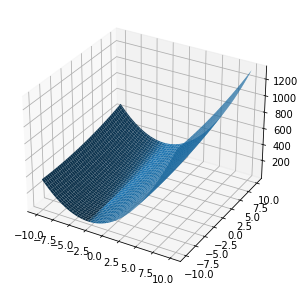

In [ ]:
#@title
display(HTML("<h2>3.1. Квадратичная функция:</h2>"))
a = [7, 0.5]
b = [3, 7]
beautiful_function(a, b)

t = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f((X, Y), a, b))
print("", end="")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

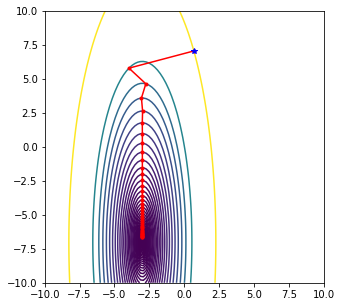

In [ ]:
#@title
display(HTML("<h2>3.1.1. Градиентный спуск с постоянным шагом:</h2>"))
x = np.random.uniform(-10, 10, 2)
count, points = grad_desc(x, 0.09, 40, a, b)

if count == -1:
    display(HTML("<h3>Метод расходится</h3>"))
else:
    beautiful_matrix(points)
    display(HTML("<h3>Количество высчитанных градиентов: " + str(count) + "</h3>"))
    plt.contour(X, Y, f((X, Y), a, b), levels=sorted([f(p, a, b) for p in points]))
    plt.plot(points[:, 0], points[:, 1], '.-', color="r")
    plt.plot(points[0, 0], points[0, 1], '*', color="b")
print("", end="")

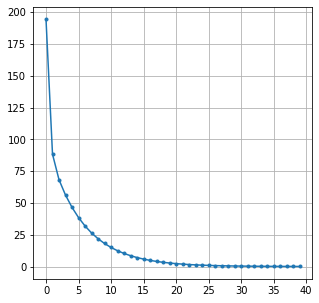

In [ ]:
#@title
plt.plot(f(points.T, a, b), ".-")
plt.grid()
print("", end="")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

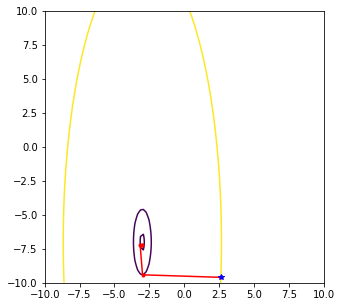

In [ ]:
#@title
display(HTML("<h2>3.1.2. Градиентный спуск с одномерным поиском Фибоначчи:</h2>"))
x = np.random.uniform(-10, 10, 2)
count_f, count_grad, points = grad_desc_fib(x, 40, a, b)
beautiful_matrix(points)
display(HTML("<h3>Количество высчитанных функций: " + str(count_f) + "</h2>"))
display(HTML("<h3>Количество высчитанных градиентов: " + str(count_grad) + "</h2>"))

plt.contour(X, Y, f((X, Y), a, b), levels=sorted(list(set([f(p, a, b) for p in points]))))
plt.plot(points[:, 0], points[:, 1], '.-', color="r")
plt.plot(points[0, 0], points[0, 1], '*', color="b")
print("", end="")

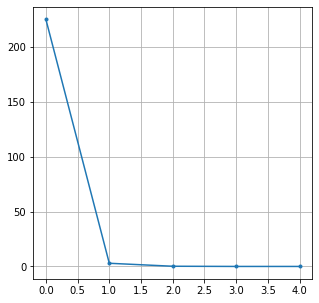

In [ ]:
#@title
plt.plot(f(points.T, a, b), ".-")
plt.grid()
print("", end="")

<IPython.core.display.Math object>

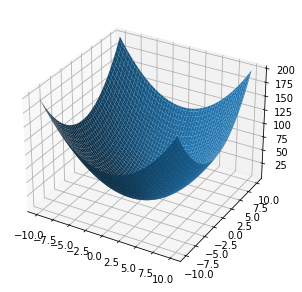

In [ ]:
#@title
display(HTML("<h2>3.2. Квадратичная функция:</h2>"))
a = [1, 1]
b = [0, 0]
beautiful_function(a, b)

t = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f((X, Y), a, b))
print("", end="")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

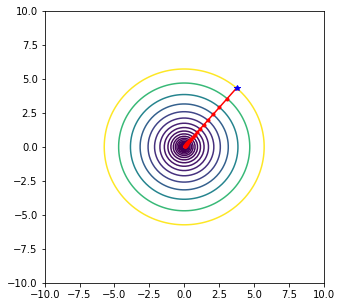

In [ ]:
#@title
display(HTML("<h2>3.2.1. Градиентный спуск с постоянным шагом:</h2>"))
x = np.random.uniform(-10, 10, 2)
count, points = grad_desc(x, 0.09, 40, a, b)
if count == -1:
    display(HTML("<h3>Метод расходится</h3>"))
else:
    beautiful_matrix(points)
    display(HTML("<h3>Количество высчитанных градиентов: " + str(count) + "</h2>"))
    plt.contour(X, Y, f((X, Y), a, b), levels=sorted([f(p, a, b) for p in points]))
    plt.plot(points[:, 0], points[:, 1], '.-', color="r")
    plt.plot(points[0, 0], points[0, 1], '*', color="b")
print("", end="")

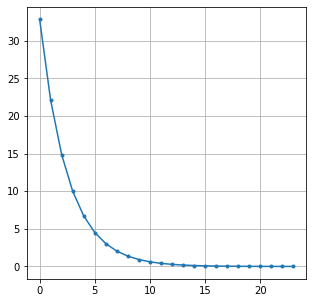

In [ ]:
#@title
plt.plot(f(points.T, a, b), ".-")
plt.grid()
print("", end="")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

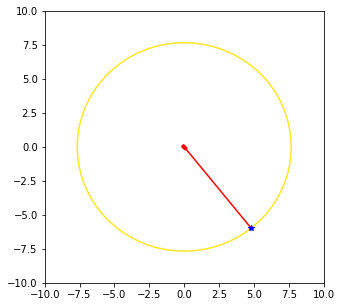

In [ ]:
#@title
display(HTML("<h2>3.2.2. Градиентный спуск с одномерным поиском Фибоначчи:</h2>"))
x = np.random.uniform(-10, 10, 2)

count_f, count_grad, points = grad_desc_fib(x, 40, a, b)

beautiful_matrix(points)

display(HTML("<h3>Количество высчитанных функций: " + str(count_f) + "</h2>"))
display(HTML("<h3>Количество высчитанных функций: " + str(count_grad) + "</h2>"))

plt.contour(X, Y, f((X, Y), a, b), levels=sorted(list(set([f(p, a, b) for p in points]))))
plt.plot(points[:, 0], points[:, 1], '.-', color="r")
plt.plot(points[0, 0], points[0, 1], '*', color="b")
print("", end="")

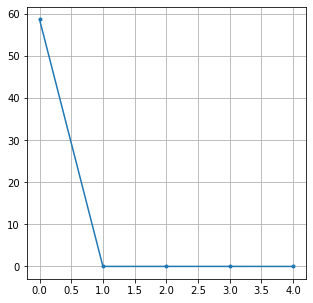

In [ ]:
#@title
plt.plot(f(points.T, a, b), ".-")
plt.grid()
print("", end="")

<IPython.core.display.Math object>

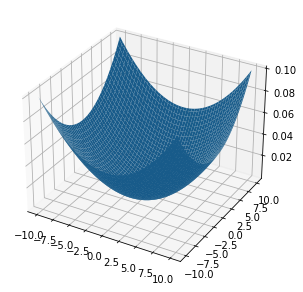

In [ ]:
#@title
display(HTML("<h2>3.3. Квадратичная функция, полученная сжатием осей координат из предыдущей:</h2>"))
a = [0.0005, 0.0005]
b = [0, 0]
beautiful_function(a, b)

t = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f((X, Y), a, b))
print("", end="")

<IPython.core.display.Math object>

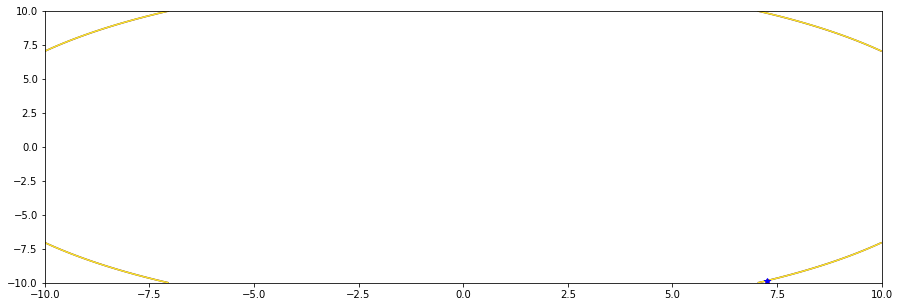

In [ ]:
#@title
display(HTML("<h2>3.3.1. Градиентный спуск с постоянным шагом:</h2>"))
x = np.random.uniform(-10, 10, 2)
count, points = grad_desc(x, 0.09, 40, a, b)
if count == -1:
    display(HTML("<h3>Метод расходится</h3>"))
else:
    beautiful_matrix(points)
    display(HTML("<h3>Количество высчитанных градиентов: " + str(count) + "</h2>"))
    plt.contour(X, Y, f((X, Y), a, b), levels=sorted([f(p, a, b) for p in points]))
    plt.plot(points[:, 0], points[:, 1], '.-', color="r")
    plt.plot(points[0, 0], points[0, 1], '*', color="b")
print("", end="")

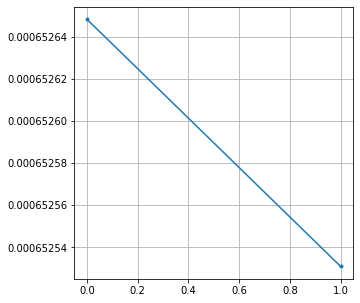

In [ ]:
#@title
plt.plot(f(points.T, a, b), ".-")
plt.grid()
print("", end="")

<IPython.core.display.Math object>

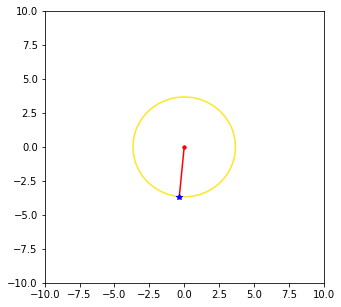

In [ ]:
#@title
display(HTML("<h2>3.3.2. Градиентный спуск с одномерным поиском Фибоначчи:</h2>"))
x = np.random.uniform(-10, 10, 2)

count_f, count_grad, points = grad_desc_fib(x, 40, a, b, 1000, 0.1)

beautiful_matrix(points)

display(HTML("<h3>Количество высчитанных функций: " + str(count_f) + "</h2>"))
display(HTML("<h3>Количество высчитанных функций: " + str(count_grad) + "</h2>"))

plt.contour(X, Y, f((X, Y), a, b), levels=sorted(list(set([f(p, a, b) for p in points]))))
plt.plot(points[:, 0], points[:, 1], '.-', color="r")
plt.plot(points[0, 0], points[0, 1], '*', color="b")
print("", end="")

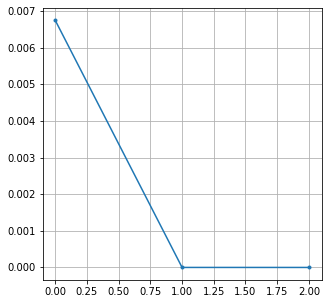

In [ ]:
#@title
plt.plot(f(points.T, a, b), ".-")
plt.grid()
print("", end="")

In [ ]:
#@title
display(HTML("<h2>5. Генератор случайных квадратичных функций</h2>"))

In [ ]:
#@title
def random_func(n, k):
    if k == 0:
      return np.zeros((n, 1)), np.zeros((n, 1))
    if k > 0:
        interval = [1, k]
    else:
        interval = [k, -1]
    a = np.random.uniform(*interval, n)
    b = np.zeros(n)
    max_a = np.argmax(a)
    min_a = np.argmin(a)
    a[max_a] = a[min_a] * k
    return a, b

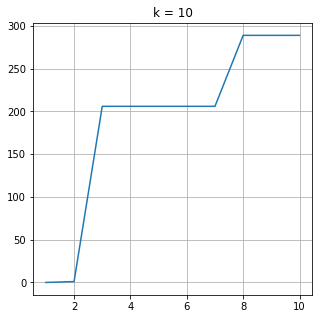

In [ ]:
#@title
display(HTML("<h2>6. Исследование числа итераций T(n, k)</h2>"))

def T(n, k, x, a=None, b=None):
    if a is None and b is None:
        a, b = random_func(n, k)
    count_grad, _ = grad_desc(x, 0.0009, 1000, a, b)
    return count_grad

k = 10
n = 10
count_grad = np.zeros(n)
x = np.random.uniform(-10, 10, n)
a, b = random_func(n, k)
for i in range(1, n):
    count_grad[i] =  T(i, k, x[:i], a[:i], b[:i])
if -1 in count_grad:
    display(HTML("<h3>Значения (-1) показывают несходимость метода при данных параметрах</h3>"))
plt.plot(range(1, n+1), count_grad, "-")
plt.title("k = " + str(k))
plt.grid()

In [ ]:
#@title
display(HTML("<h2>7. Множественное исследование числа итераций T(n, k)</h2>"))
N = sorted(np.random.randint(1, 1000, size=10))
COUNT = np.zeros((10, 10))
j = 0
K = np.random.randint(1000, size=10)
for k in K:
    i = 0
    for n in N:
        x = np.random.uniform(-10, 10, n)
        a, b = random_func(n, k)
        COUNT[j, i] =  T(n, k, x, a, b)
        i += 1
    j += 1
print(COUNT)

[[ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1. 290.  -1. 538.  -1.  -1.]
 [ 73. 192. 324. 285. 312. 355. 316. 301. 289. 354.]
 [ -1.  -1. 210.  -1.  -1.  -1.  -1.  -1.  -1. 239.]
 [185. 197. 260. 341. 348. 312. 332. 313. 340. 339.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1. 361.  -1.  -1. 278. 267. 259. 249. 266. 316.]
 [ -1.  -1.  -1. 186.  -1.  -1.  -1.  -1.  -1. 254.]
 [ -1. 273. 189. 300. 272. 311. 292. 247. 329. 273.]
 [ -1.  -1. 318.  -1. 234.  -1.  -1. 261. 289.  -1.]]


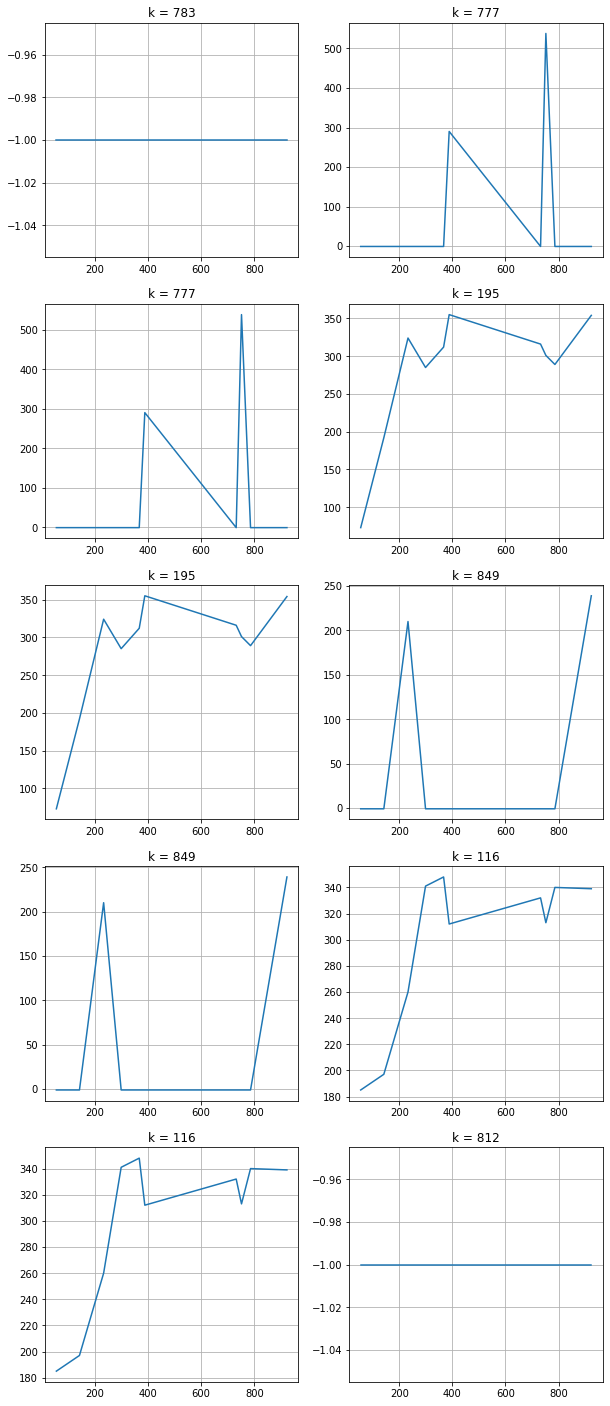

In [ ]:
#@title
plt.rcParams["figure.figsize"] = (10,25)
figure, axis = plt.subplots(5, 2)
if -1 in COUNT:
    display(HTML("<h3>Значения (-1) показывают несходимость метода при данных параметрах</h3>"))
for i in range(5):
    for k in range(2):
        axis[i, k].plot(N, COUNT[k+i], "-")
        axis[i, k].set_title("k = " + str(K[i+k]))
        axis[i, k].grid()

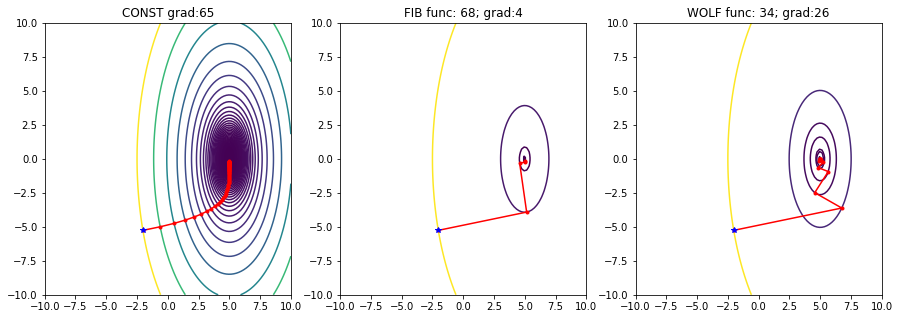

In [ ]:
#@title
def WolfeCond(xk, pk, alpha, f, c, condition, a, b):
    wolfe_arg = xk + alpha * pk
    if condition == 2:
        return np.dot(f(wolfe_arg, a, b), pk) >= -c * np.dot(pk, pk)
    elif condition == 1:
        return f(wolfe_arg, a, b) <= f(xk, a, b) - c * alpha * np.dot(pk, pk)
    else:
        return False


# n - number of iterations
def grad_descent_wolfe(x, n, a, b):
    global epsilon
    points = [x]

    app = 5e-10
    count_grad = 0
    count_f = 0

    for i in range(n):
        gradient = grad(x, a, b)
        count_grad += 1
        min_learning_rate = 1e-10
        max_learning_rate = 10
        fl = 0

        while max_learning_rate - min_learning_rate > app:
            m = (min_learning_rate + max_learning_rate) / 2

            if not WolfeCond(x, -gradient, m, f, 0.0001, 1, a, b):
                count_f += 1
                max_learning_rate = m
            elif not WolfeCond(x, -gradient, m, grad, 0.999, 2, a, b):
                count_f += 3
                min_learning_rate = m
            else:
                fl = m
                break

        if fl == 0:
            break
        x = x - fl * gradient
        count_grad+=1
        points.append(x)
        if (abs(points[i] - points[i - 1]) < epsilon).all():
            break
    return count_f, count_grad, np.array(points)

display(HTML("<h2>Бонус: одномерный поиск с учетом условий Вольфе</h2>"))

x = np.random.uniform(-10, 10, 2)
a = [1, 0.25]
b = [-5, 0]
n = 100

plt.rcParams["figure.figsize"] = (15,5)
figure, axis = plt.subplots(1, 3)

count_grad, points = grad_desc(x, 0.1, n, a, b)

axis[0].contour(X, Y, f((X, Y), a, b), levels=sorted(list(set([f(p, a, b) for p in points]))))
axis[0].plot(points[:, 0], points[:, 1], '.-', color="r")
axis[0].plot(points[0, 0], points[0, 1], '*', color="b")
axis[0].set_title("CONST grad:" + str(count_grad))

count_f, count_grad, points = grad_desc_fib(x, n, a, b)

axis[1].contour(X, Y, f((X, Y), a, b), levels=sorted(list(set([f(p, a, b) for p in points]))))
axis[1].plot(points[:, 0], points[:, 1], '.-', color="r")
axis[1].plot(points[0, 0], points[0, 1], '*', color="b")
axis[1].set_title("FIB func: " + str(count_f) + "; grad:" + str(count_grad))

count_f, count_grad, points_wolfe = grad_descent_wolfe(x, n, a, b)

axis[2].contour(X, Y, f((X, Y), a, b), levels=sorted(list(set([f(p, a, b) for p in points_wolfe]))))
axis[2].plot(points_wolfe[:, 0], points_wolfe[:, 1], '.-', color="r")
axis[2].plot(points_wolfe[0, 0], points_wolfe[0, 1], '*', color="b")
axis[2].set_title("WOLF func: " + str(count_f) + "; grad:" + str(count_grad))
print()